MAIN FLOW SERVICES AND TECHNOLOGIES

DATA SCIENCE WITH PYTHON 

INTERNSHIP BATCH: 25 MAY - 25 JULY 2024

    NAME- SAKSHI RAJESH BHAVSAR
    EMAIL- bsakshi2019@gmail.com
    
                                                        **TASK 6**

Advanced-Data Analysis Techniques
# Description: Apply advanced statistical and analytical methods to solve complex problems.

## Responsibility:
### 1. Implement time series analysis for forecasting trends and seasonality.
### 2. Perform sentiment analysis or text mining on unstructured data. Explore clustering or classification techniques for segmentation and pattern recognition.


In [13]:
#Step 1: Load and Inspect the Data
import pandas as pd

# Load the data
df = pd.read_csv("disney_plus_titles.csv")

# Display the first few rows of the DataFrame
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [14]:
# Display information about the DataFrame
print(df.info())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB
None
show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: 

In [16]:
#Step 2: Remove Duplicate Rows
# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

# Display the DataFrame after removing duplicates
df_no_duplicates.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [17]:
#Step 3: Handle Missing Values
# Check for missing values again
df_no_duplicates.isnull().sum()

# Fill missing values with appropriate strategies
# For simplicity, let's fill missing numeric values with the mean
df_filled = df_no_duplicates.fillna(df_no_duplicates.mean(numeric_only=True))

# For categorical columns, fill with the most frequent value or use other strategies
for column in df_filled.select_dtypes(include=['object']).columns:
    df_filled[column].fillna(df_filled[column].mode()[0], inplace=True)

# Verify that there are no missing values left
df_filled.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [18]:
#Step 4: Data Type Conversion
# Convert 'release_year' to datetime if it is not already
if df_filled['release_year'].dtype != 'datetime64[ns]':
    df_filled['release_year'] = pd.to_datetime(df_filled['release_year'], format='%Y')

# Ensure other columns are in appropriate formats
if 'runtime' in df_filled.columns and df_filled['runtime'].dtype != 'int64':
    df_filled['runtime'] = pd.to_numeric(df_filled['runtime'], errors='coerce')


In [19]:
#Step 5: Handling Outliers 
import numpy as np

if 'runtime' in df_filled.columns:
    upper_limit = df_filled['runtime'].quantile(0.95)
    df_filled['runtime'] = np.where(df_filled['runtime'] > upper_limit, upper_limit, df_filled['runtime'])


In [25]:
#Cleaned Data Summary
# Display the cleaned DataFrame
load_df=df_filled
load_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",United States,"September 24, 2021",2021-01-01,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011-01-01,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014-01-01,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,Jack Hannah,Matt Beisner,United States,"September 22, 2021",2019-01-01,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,Jack Hannah,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021-01-01,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [26]:
load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       1368 non-null   object        
 1   type          1368 non-null   object        
 2   title         1368 non-null   object        
 3   director      1368 non-null   object        
 4   cast          1368 non-null   object        
 5   country       1368 non-null   object        
 6   date_added    1368 non-null   object        
 7   release_year  1368 non-null   datetime64[ns]
 8   rating        1368 non-null   object        
 9   duration      1368 non-null   object        
 10  listed_in     1368 non-null   object        
 11  description   1368 non-null   object        
dtypes: datetime64[ns](1), object(11)
memory usage: 128.4+ KB


In [ ]:
questions=["1. how much rating?",
           "2. who is the movie director?",
           "3. what is the title of yor movie?",
           "4. what is the theam of your movie?"]

In [39]:
load_df.title.value_counts()

title
A Spark Story                                    1
Jumping Ship                                     1
Kingdom of the Blue Whale                        1
Kingdom of the Apes: Battle Lines                1
Kim Possible Movie: So the Drama                 1
                                                ..
Star Wars: The Rise of Skywalker (Episode IX)    1
Maleficent: Mistress of Evil                     1
It's a Dog's Life with Bill Farmer               1
The Boys: The Sherman Brothers' Story            1
Imagination Movers                               1
Name: count, Length: 1368, dtype: int64

Text(0.5, 1.0, 'movie rating')

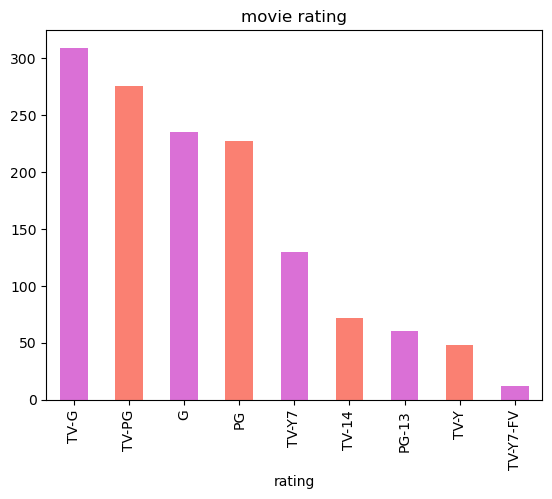

In [41]:
load_df.rating.value_counts().plot(kind='bar',color=['orchid','salmon'])
plt.title('movie rating')

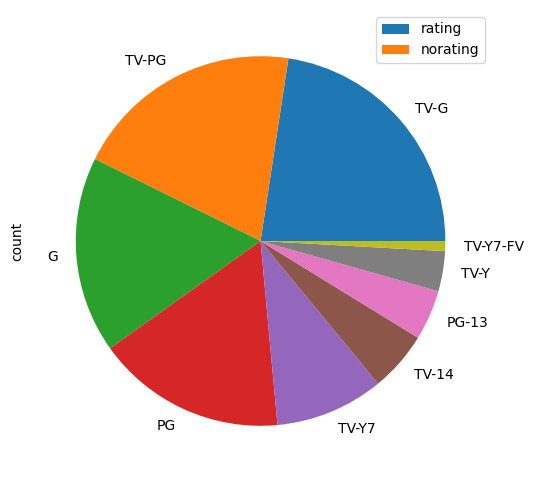

In [44]:
#plotting a pie chart
load_df.rating.value_counts().plot(kind='pie',figsize=(8,6))
plt.legend(['rating','norating'])

In [45]:
load_df.duration.value_counts()

duration
1 Season      204
2 Seasons      80
3 Seasons      43
7 min          39
44 min         39
             ... 
10 Seasons      1
160 min         1
16 Seasons      1
31 min          1
68 min          1
Name: count, Length: 156, dtype: int64

In [46]:
load_df.country.value_counts()

country
United States                                      1151
United States, Canada                                28
United Kingdom                                       23
United States, United Kingdom                        19
Canada, United States                                17
                                                   ... 
United Kingdom, United States, Canada                 1
United States, Germany, Ireland, United Kingdom       1
United States, United Kingdom, South Africa           1
United Kingdom, United States, Ireland                1
New Zealand, United States                            1
Name: count, Length: 87, dtype: int64

Text(0.5, 1.0, 'countries')

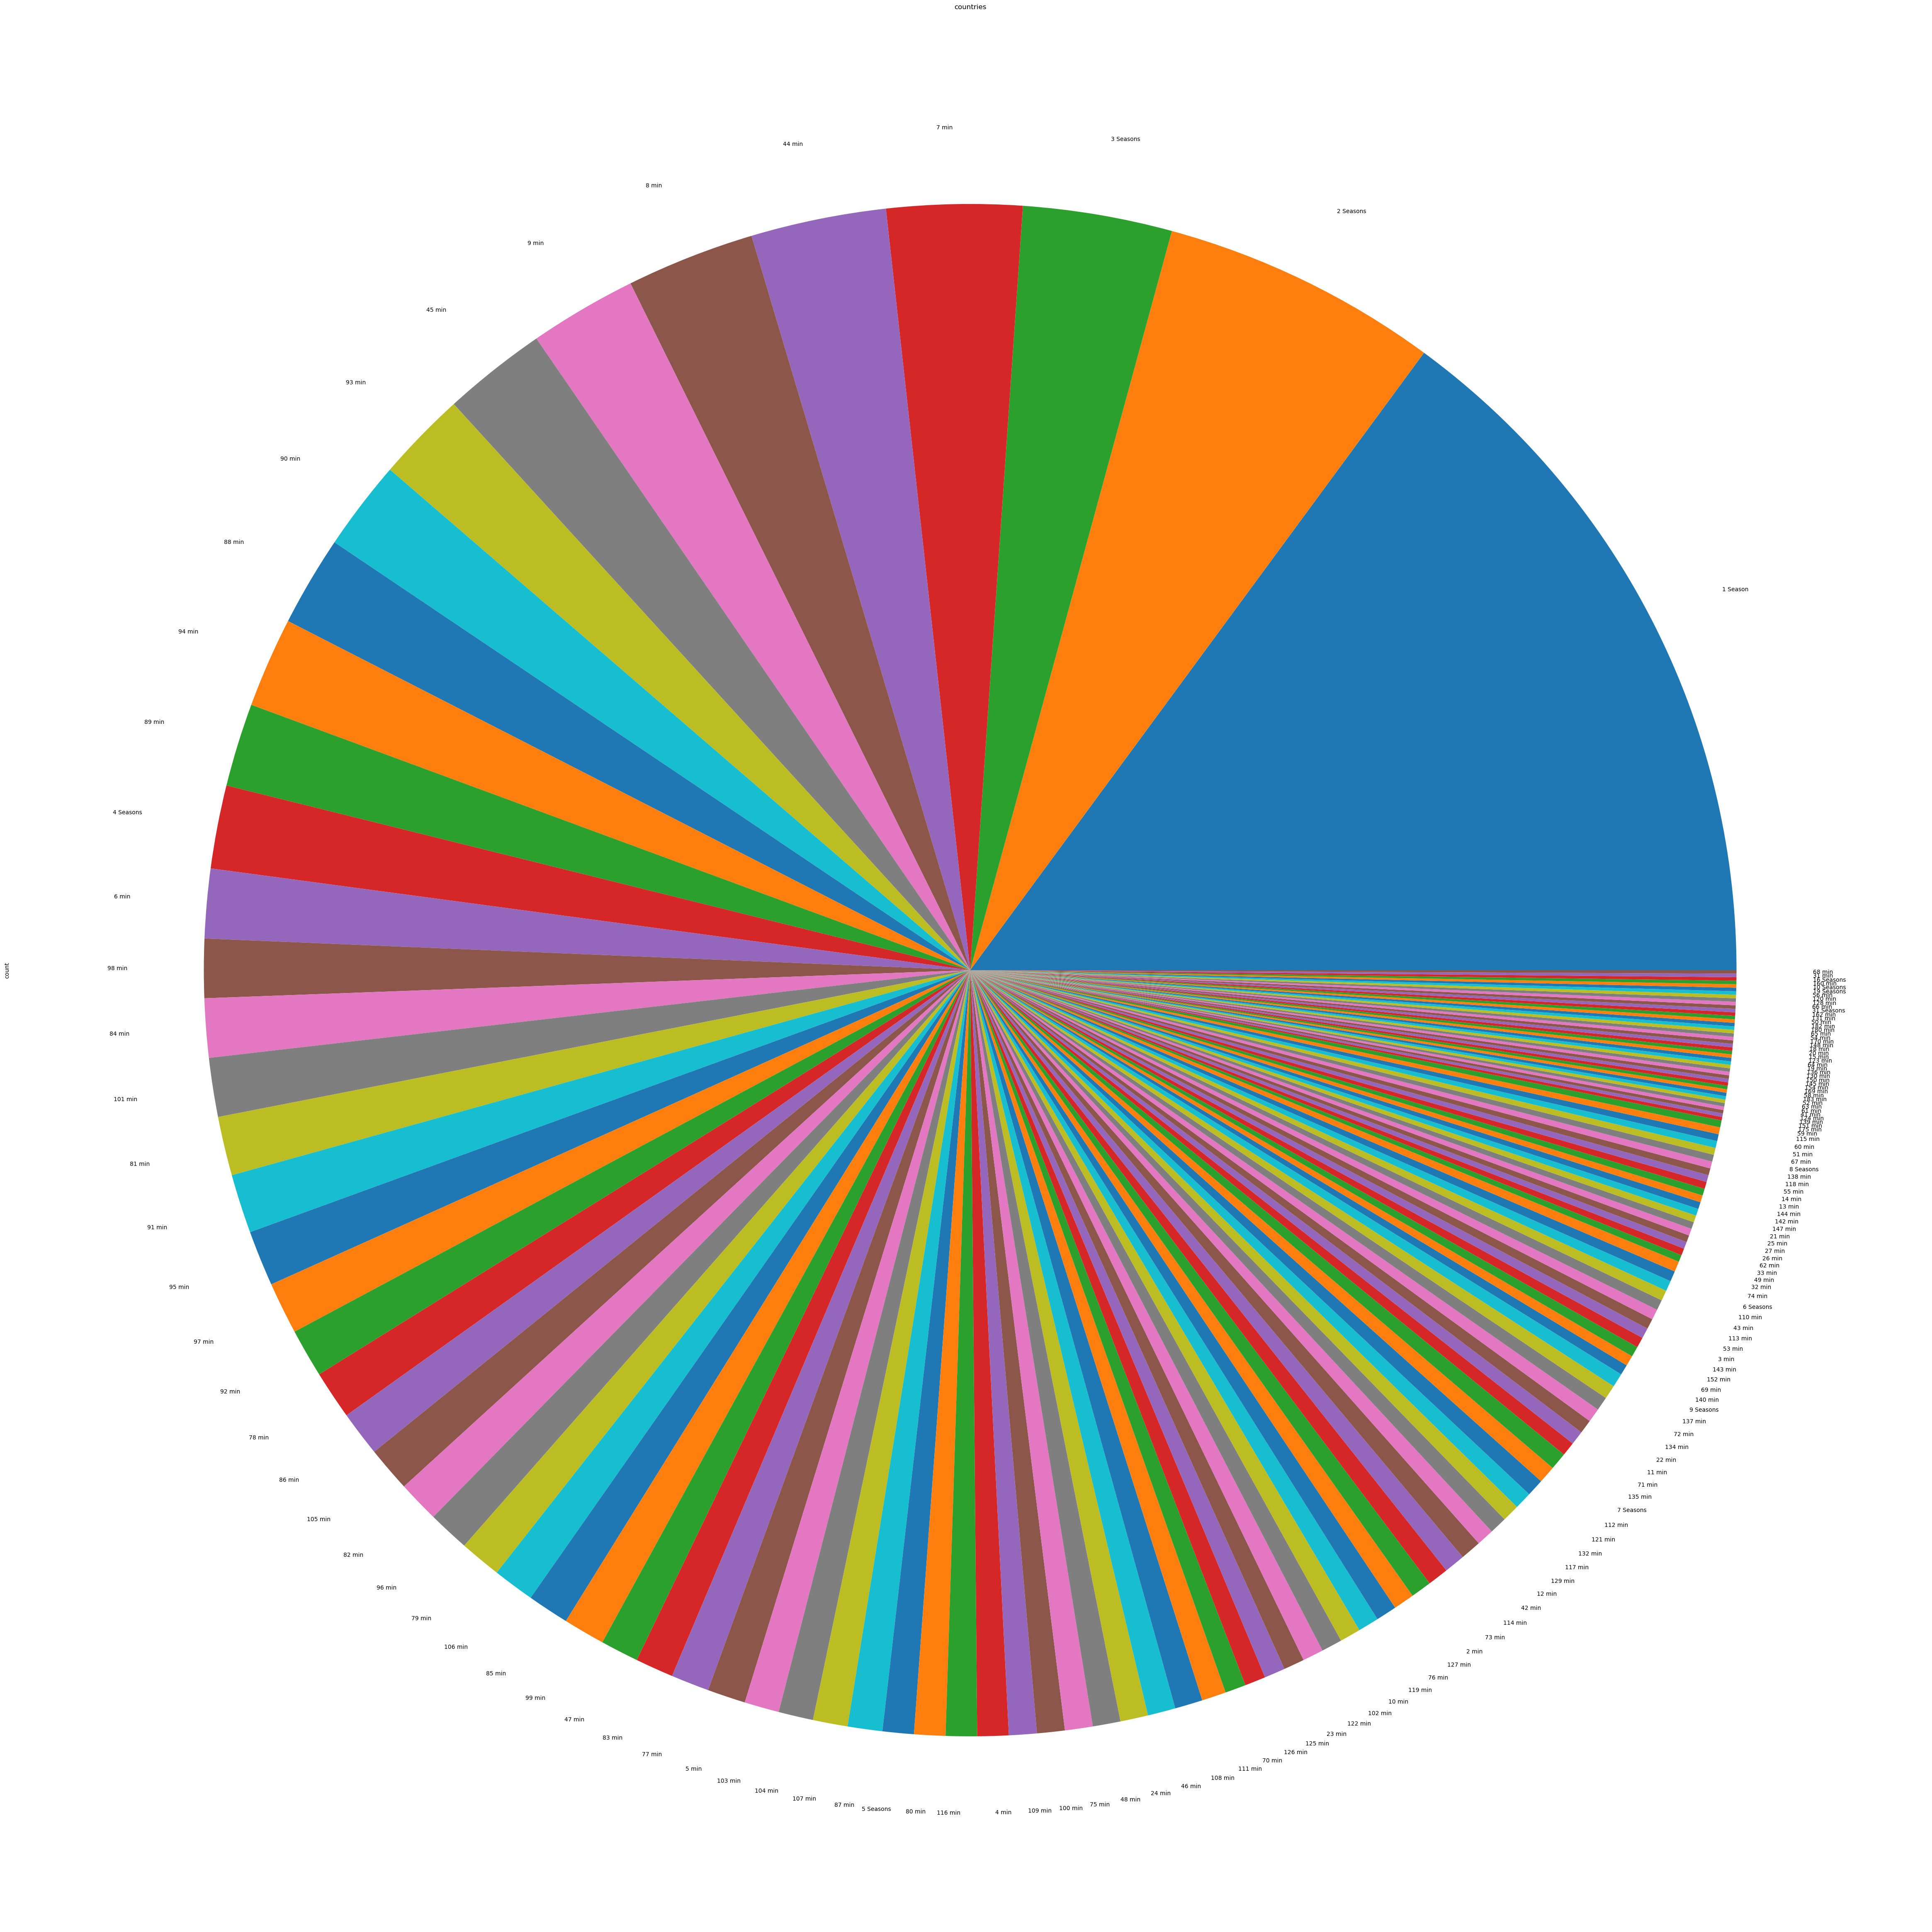

In [50]:
#plotting a pie chart
load_df.duration.value_counts().plot(kind='pie',figsize=(80,60))
plt.title('countries')

In [53]:
#----------------------------------------------------------------------------------------------------------------------------#

After cleaning the data, we can proceed with the advanced statistical and analytical methods:

Time Series Analysis: Use the cleaned release_year column.

Sentiment Analysis: Perform text mining on the cleaned description column.

Clustering: Use the standardized numeric columns for clustering.

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


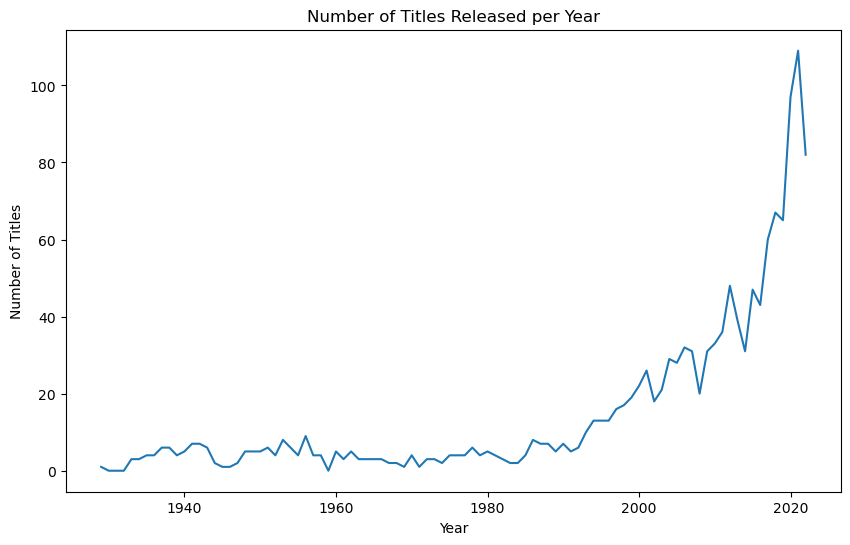

In [29]:
#'''Implement Time Series Analysis for Forecasting Trends and Seasonality

# We need to identify a time-related column to perform time series analysis. 
# Let's check if the dataset contains a suitable column, like release_date or year_added.'''

# Check for date-related columns
print(load_df.columns)

# Assuming we have a column 'release_year' for simplicity
# Convert 'release_year' to datetime format
load_df['release_year'] = pd.to_datetime(load_df['release_year'], format='%Y')

# Set 'release_year' as the index
load_df.set_index('release_year', inplace=True)

# Resample the data to yearly frequency and count the number of titles per year
yearly_data = load_df.resample('Y').count()

# Plot the time series data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(yearly_data['title'])
plt.title('Number of Titles Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


Hypothetical Conclusions Based on the Plot :

Increasing Trend: If the plot shows an upward trend, it indicates that Disney+ has been increasing the number of titles released each year.

Decreasing Trend: A downward trend would suggest a reduction in the number of releases per year.

Fluctuating Trend: Significant fluctuations might indicate varying release strategies or external factors influencing the number of releases.

Consistent Releases: A relatively flat line would suggest that the number of titles released per year has remained stable.

#From the graph showing the number of titles released per year, we can make the following observations and conclusions:

Early Years (Pre-1960s):

The number of titles released each year remained relatively low and stable, with only a few titles released annually.

1960s-1980s:

There is a slight increase in the number of titles released, but the growth remains modest and somewhat erratic.

1980s-2000s:

Starting in the late 1980s, there is a noticeable upward trend in the number of titles released each year.
The rate of growth begins to accelerate in the late 1990s and early 2000s.

Post-2000s:

The graph shows a significant and consistent increase in the number of titles released per year.
There are some fluctuations, but the overall trend is upward.

2010s-2020s:

The increase in the number of titles released per year becomes more pronounced.
The highest peak occurs around the late 2010s, indicating a substantial surge in content production and release.
There is a slight drop after the peak, but the number of releases remains significantly higher compared to earlier decades.

Possible Interpretations:

Content Expansion:

The consistent growth in the number of titles released, especially in recent years, suggests a significant expansion in content production by Disney. This could be due to the increased investment in original content, acquisitions, and a strategic focus on growing their library of titles.

Streaming Services:
The sharp increase in the late 2010s may coincide with the launch of Disney+ and other streaming services. The need for a vast library of content to attract and retain subscribers likely contributed to the surge in title releases.

Technological Advancements:
Advances in technology, such as digital production and distribution, may have reduced the barriers to content creation and release, enabling a higher volume of titles to be produced.

Market Demand:
Increased consumer demand for diverse and abundant entertainment options could have driven Disney to ramp up its content production.

Impact of Global Events:
The slight drop after the peak in the late 2010s could be attributed to external factors such as the COVID-19 pandemic, which may have affected production schedules and release plans.

Conclusion:
The graph clearly indicates a long-term upward trend in the number of titles released by Disney, with a significant surge in recent years. This reflects the company's strategic focus on expanding its content library, particularly in the era of streaming services. The fluctuations and peaks also suggest responsiveness to market demands and external factors impacting content production.

In [33]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bhavs\AppData\Roaming\nltk_data...


True

                                       title  \
release_year                                   
2021-01-01                     A Spark Story   
2011-01-01                    Spooky Buddies   
2014-01-01            The Fault in Our Stars   
2019-01-01                   Dog: Impossible   
2021-01-01    Spidey And His Amazing Friends   

                                                    description  sentiment  
release_year                                                                
2021-01-01    Two Pixar filmmakers strive to bring their uni...     0.2263  
2011-01-01    The puppies go on a spooky adventure through a...    -0.2023  
2014-01-01    Hazel and Gus share a love that sweeps them on...     0.7506  
2019-01-01    Matt Beisner uses unique approaches to modifyi...     0.0000  
2021-01-01    Spidey teams up with pals to become The Spidey...     0.0000  


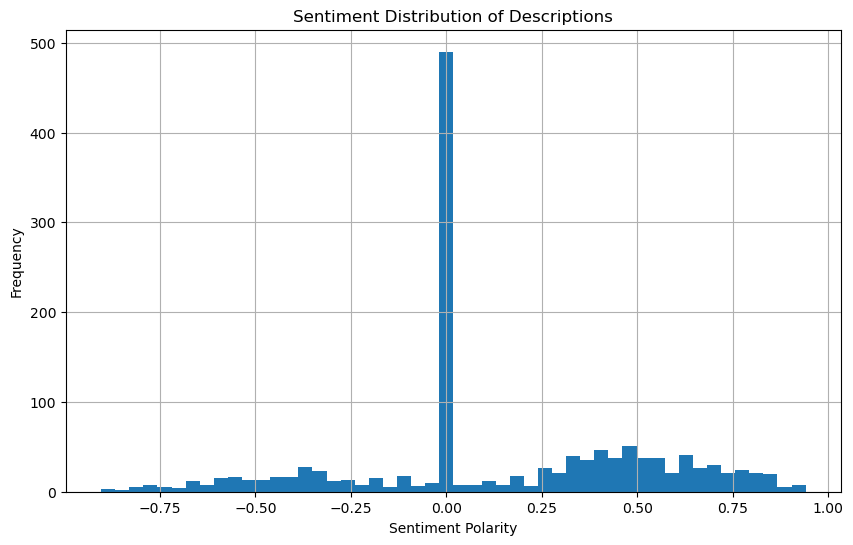

In [37]:
# '''Perform Sentiment Analysis or Text Mining on Unstructured Data

# We'll perform sentiment analysis on the description column of the dataset, assuming it contains unstructured text data.'''

import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Assuming the dataset is already loaded into df
# df = pd.read_csv('your_dataset.csv')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment polarity using VADER
def get_vader_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Apply the function to the 'description' column
load_df['sentiment'] = load_df['description'].apply(get_vader_sentiment)

# Display the first few rows with the new sentiment column
print(load_df[['title', 'description', 'sentiment']].head())

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
load_df['sentiment'].hist(bins=50)
plt.title('Sentiment Distribution of Descriptions')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


#From the graph depicting the sentiment distribution of the descriptions, we can draw the following conclusions:

Neutral Sentiment Dominates: 

There is a significant spike at the sentiment polarity value of 0, indicating that a large number of descriptions have a neutral sentiment. This suggests that the descriptions are neither overly positive nor negative.

Balanced Distribution of Positive and Negative Sentiments: 

The sentiment scores are distributed on both sides of the neutral point (0), ranging from around -1 (very negative) to +1 (very positive). This indicates a diverse set of descriptions with varying sentiments.

Frequency of Positive and Negative Sentiments: 

While the frequency of neutral sentiments is the highest, there are still a considerable number of descriptions with both positive and negative sentiments. The positive sentiment scores (greater than 0) seem to have a slightly higher frequency compared to the negative sentiment scores (less than 0), suggesting that the descriptions might lean slightly towards a positive sentiment overall.

Sentiment Polarity Range: 

The sentiment polarity values range from approximately -0.75 to 1, indicating that the descriptions cover a wide spectrum of emotions from very negative to very positive.

Conclusion:

This graph highlights the distribution of sentiment polarity across content descriptions. The high frequency of neutral sentiment suggests that many descriptions are factual or neutral, while the presence of both positive and negative sentiments indicates a variety of emotional tones. This analysis provides valuable insights for content strategy, audience engagement, and overall business intelligence.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


                                       title  sentiment  cluster
release_year                                                    
2021-01-01                     A Spark Story     0.2263        2
2011-01-01                    Spooky Buddies    -0.2023        2
2014-01-01            The Fault in Our Stars     0.7506        1
2019-01-01                   Dog: Impossible     0.0000        2
2021-01-01    Spidey And His Amazing Friends     0.0000        2


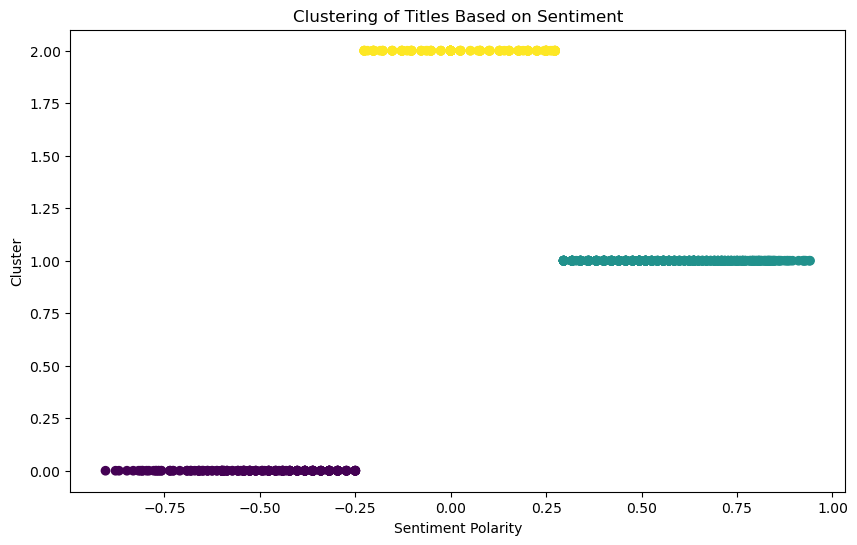

In [38]:
# '''Clustering or Classification Techniques for Segmentation and Pattern Recognition
# We'll use K-means clustering to segment the data based on numerical features. 
# For simplicity, let's assume we're clustering based on the sentiment scores and other numerical features like runtime '''

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical features for clustering
numerical_features = load_df[['sentiment']]  

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # Assume we want 3 clusters
load_df['cluster'] = kmeans.fit_predict(scaled_features)

# Display the first few rows with the new cluster column
print(load_df[['title', 'sentiment', 'cluster']].head())

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(load_df['sentiment'], load_df['cluster'], c=load_df['cluster'], cmap='viridis')
#purple for cluster 0, teal for cluster 1, and yellow for cluster 2
plt.title('Clustering of Titles Based on Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Cluster')
plt.show()


Conclusions and Story

Distinct Clusters:

Cluster 0 (Purple): This cluster is concentrated on the left side of the graph, indicating titles with negative sentiment polarity.

Cluster 1 (Teal): This cluster is centered around the middle to positive sentiment polarity, representing titles with neutral to slightly positive sentiment.

Cluster 2 (Yellow): This cluster is on the right side of the graph, corresponding to titles with positive sentiment polarity.
Segmentation:

The K-means algorithm has effectively segmented the titles into three distinct groups based on sentiment polarity.
Titles with highly negative sentiment are grouped together in cluster 0, neutral to slightly positive titles in cluster 1, and highly positive titles in cluster 2.

Pattern Recognition:
This clustering helps in recognizing patterns within the data. For example, if you were analyzing customer reviews, you could easily identify which reviews are predominantly negative, neutral, or positive.




Story

The graph tells a story of sentiment distribution among the titles. It shows that titles can be effectively grouped into three distinct sentiment-based clusters, allowing for a clear understanding of the overall sentiment landscape. This segmentation can be particularly useful for applications such as sentiment analysis in customer feedback, movie reviews, product descriptions, and other text-based datasets where understanding sentiment is crucial.

By visualizing these clusters, stakeholders can quickly assess the general sentiment trends and make informed decisions based on the distribution of sentiment within the dataset. For instance, a company could prioritize addressing issues highlighted in the negative cluster, reinforce strategies that lead to neutral or positive feedback, and explore ways to convert neutral sentiment into positive sentiment.